# 📌 Introduction & Objective

**Introduction :  
Understanding customer behavior is crucial for businesses to enhance user experience, optimize marketing strategies, and drive revenue. This project analyzes customer spending patterns based on various factors such as time spent on an app, time spent on a website, and average session durations. By visualizing and interpreting these metrics, we can gain valuable insights into how customer engagement influences spending habits.**

**Objective :  
The primary goal of this project is to:  
✅ Analyze customer spending trends using data visualization.  
✅ Compare time spent on the app vs. the website to understand user preferences.  
✅ Identify key factors that influence yearly spending.  
✅ Provide data-driven insights for business decision-making.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data loading & Preprocessing

In [64]:
df = pd.read_csv('data.csv')
print(df)

                           \tEmail  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0           835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1         4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3       1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 J

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB
None


In [5]:
print(df.isnull().sum())

\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
print(df.columns)

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [8]:
df = df.drop(["\tEmail","Address"],axis=1)
print(df.head())

             Avatar  Time on App  Time on Website  Length of Membership  \
0            Violet        12.66            39.58                  4.08   
1         DarkGreen        11.11            37.27                  2.66   
2            Bisque        11.33            37.11                  4.10   
3       SaddleBrown        13.72            36.72                  3.12   
4  MediumAquaMarine        12.80            37.54                  4.45   

   Yearly Amount Spent  
0               587.95  
1               392.20  
2               487.55  
3               581.85  
4               599.41  


In [9]:
print(df.describe())

       Time on App  Time on Website  Length of Membership  Yearly Amount Spent
count   500.000000       500.000000             500.00000           500.000000
mean     12.052620        37.060480               3.53336           499.314240
std       0.994418         1.010555               0.99926            79.314764
min       8.510000        33.910000               0.27000           256.670000
25%      11.390000        36.347500               2.93000           445.037500
50%      11.980000        37.070000               3.53500           498.890000
75%      12.752500        37.720000               4.13000           549.312500
max      15.130000        40.010000               6.92000           765.520000


# Exploratory Data Analysis

In [10]:
import seaborn as sns

In [11]:
df_num = df.select_dtypes(include=['number'])
print(df_num.corr())

                      Time on App  Time on Website  Length of Membership  \
Time on App              1.000000         0.082285              0.029240   
Time on Website          0.082285         1.000000             -0.047443   
Length of Membership     0.029240        -0.047443              1.000000   
Yearly Amount Spent      0.499315        -0.002601              0.809184   

                      Yearly Amount Spent  
Time on App                      0.499315  
Time on Website                 -0.002601  
Length of Membership             0.809184  
Yearly Amount Spent              1.000000  


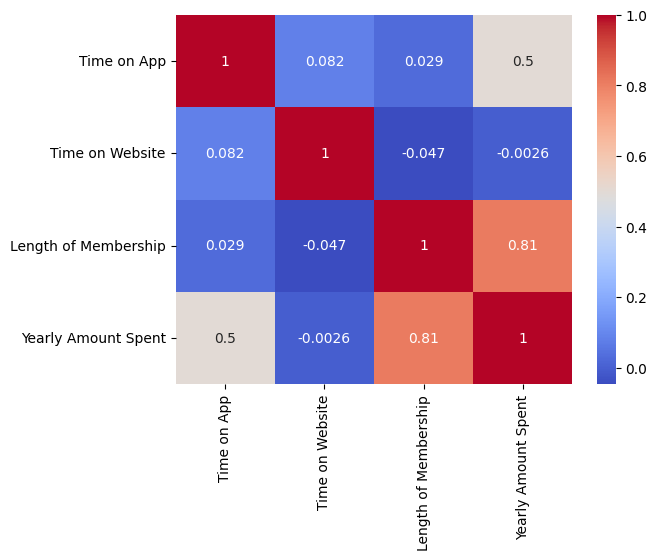

In [12]:
sns.heatmap(df_num.corr(),annot=True,cmap="coolwarm")
plt.show()

**Observation 1**

**1.Time on app vs Yearly amount spent (0.5)**  
*Moderate positive correlation : Customers who spends more time on app tends to spend more money.  
-> That means App time affects the money spending*  

**2.Time on website vs Yearly amount spent (-0.0026)**  
*No significant relationship (nearly equals to zero)  
-> Website time does not affects customer spending behaviour*  

**3.Length of membership vs Yearly amount spent (0.81)**  
*Strong positive correlation : Customers who are members for long time spends more money.  
-> Loyal customers spends more money over time.*  

**4.Time on app vs Time on Website (0.082)**  
*Weak correlation.  
-> Customers who spends more time on app does not spend time on website.*  

**5.Length of Membership vs. Time on App (0.0292)**  
*Very weak correlation.  
-> Being a long-time member does not significantly impact time spent on the app.*  

**6. Length of Membership vs. Time on Website (-0.0474)**  
*Slight negative correlation.  
-> Longer membership slightly decreases time spent on the website (but the effect is very weak).*

In [13]:
#Money Spending of Avatars

In [14]:
top = df.groupby("Avatar")["Yearly Amount Spent"].sum().nlargest(5).reset_index()

In [15]:
print(top)

        Avatar  Yearly Amount Spent
0  GreenYellow              3526.17
1    SlateBlue              3507.30
2         Cyan              3456.13
3    CadetBlue              3364.71
4        Wheat              3307.63


In [16]:
top_min = df.groupby("Avatar")["Yearly Amount Spent"].sum().nsmallest(5).reset_index()

In [17]:
print(top_min)

           Avatar  Yearly Amount Spent
0             Red               425.75
1       LawnGreen               434.02
2  LightSlateGray               436.72
3           Azure               452.63
4      PowderBlue               457.85


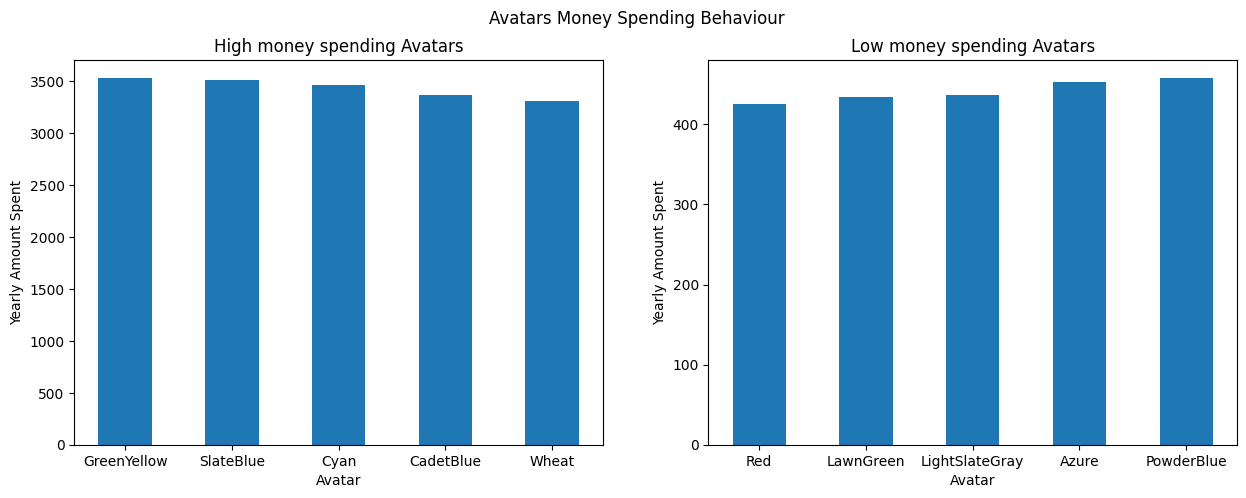

In [18]:
#Top Spending Avatars
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(top["Avatar"],top["Yearly Amount Spent"],width=0.5)
plt.xlabel("Avatar")
plt.ylabel("Yearly Amount Spent")
plt.title("High money spending Avatars")

#Top Low Spending avatars
plt.subplot(1,2,2)
plt.bar(top_min["Avatar"],top_min["Yearly Amount Spent"],width=0.5)
plt.xlabel("Avatar")
plt.ylabel("Yearly Amount Spent")
plt.title("Low money spending Avatars")
plt.suptitle("Avatars Money Spending Behaviour")
plt.show()

**Observation 2**

**1. Most valueable customer segment :**  
*The highest total spending Avatar category **'GreenYellow'** indicates the most profitable customer types*  

**2. Low performing Avatars :**  
*The lowest total spending Avatar category is **'Red'**..*

In [19]:
#Time Spent on application vs Yearly spending 

In [20]:
app_data = df.groupby("Time on App")["Yearly Amount Spent"].sum().reset_index()

In [21]:
print(app_data)

     Time on App  Yearly Amount Spent
0           8.51               302.19
1           8.67               308.53
2           9.32               384.33
3           9.48               531.96
4           9.61               507.21
..           ...                  ...
276        14.29               501.12
277        14.33               626.02
278        14.43               640.19
279        14.72               452.32
280        15.13               765.52

[281 rows x 2 columns]


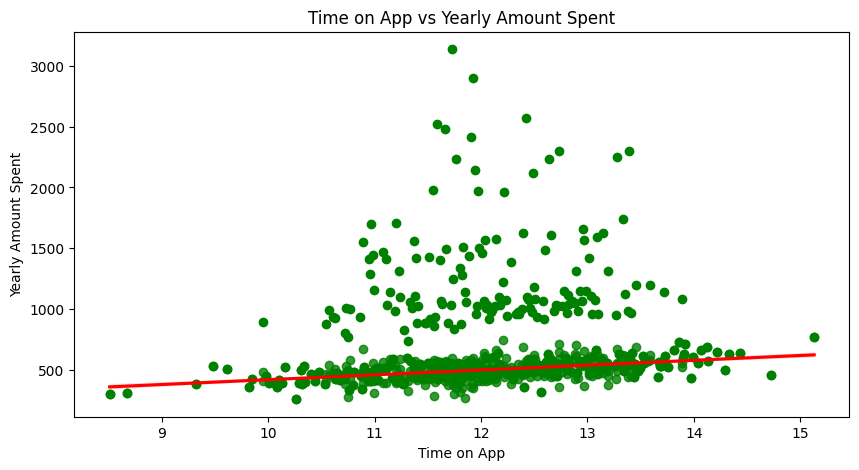

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(app_data["Time on App"],app_data["Yearly Amount Spent"],color="green")
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.title("Time on App vs Yearly Amount Spent")
sns.regplot(x=df["Time on App"],y=df["Yearly Amount Spent"],scatter_kws={"color":"green"},line_kws={"color":"red"})
plt.show()

**Observation 3**

**1. Most of the spending hours are between 10 to 13  
2. The Yearly Amount spending varies from $500 to $3000  
3. There might be slightly strong correlation as spending increases with time in some cases  
4. However the plot is widely spread so the correlation is not very strong  
5. Some points are above $3000 depicts that some users spend more despite spending same time on app  
6. There are also few customers who spends less Amount despite having simillar time  
7. Upward sloping line that means positive correlation**

In [23]:
#Time Spent on Website vs Yearly Amount Spent

In [24]:
web_time = df.groupby("Time on Website")["Yearly Amount Spent"].sum().reset_index()

In [25]:
print(web_time)

     Time on Website  Yearly Amount Spent
0              33.91               744.22
1              34.48               637.10
2              34.49               458.78
3              34.57               414.94
4              34.65               577.74
..               ...                  ...
269            39.29               350.06
270            39.58               587.95
271            39.60               489.81
272            39.67               581.80
273            40.01               451.58

[274 rows x 2 columns]


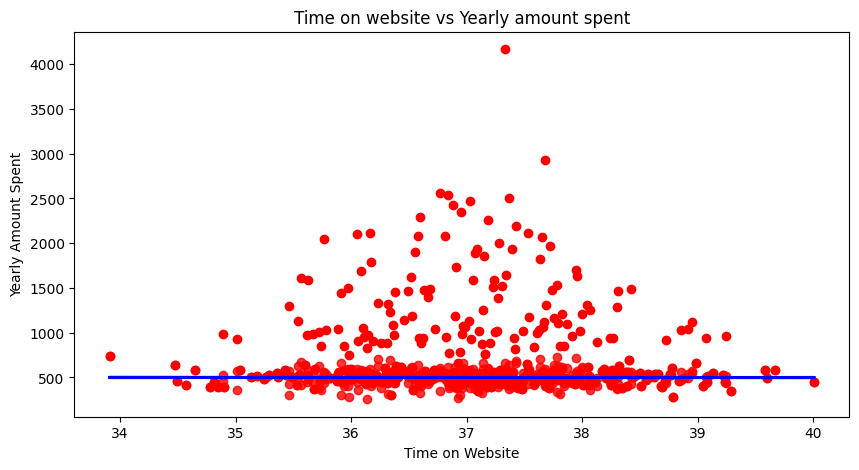

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(web_time["Time on Website"],web_time["Yearly Amount Spent"],color="red")
plt.xlabel("Time on Website")
plt.ylabel("Yearly amount spent")
plt.title("Time on website vs Yearly amount spent")
sns.regplot(x=df["Time on Website"],y=df["Yearly Amount Spent"],scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.show()

**Observation 4**

**1. Slightly downword sloping line that means negative correlation  
2. The time spent on website varies from 34 to 40  
3. The Amount Spent varies from 500 to 4000  
4. The customers spending more time on website do not tend to spend more amount yearly  
5. Although there are some customer(very few) who spends more amount despite spending same amount of time**

# Customer Segmentation

**1.Calculating yearly average spending**

In [27]:
avg_spending = df["Yearly Amount Spent"].mean()
print(f"Average Yearly Spending : {avg_spending}")

Average Yearly Spending : 499.31424


**2. Creating segments based on spending**

In [28]:
df["Customer Segment"] = df["Yearly Amount Spent"].apply(lambda x : "High Value" if x>avg_spending else "Regular")
print(df["Customer Segment"])

0      High Value
1         Regular
2         Regular
3      High Value
4      High Value
          ...    
495    High Value
496    High Value
497    High Value
498       Regular
499       Regular
Name: Customer Segment, Length: 500, dtype: object


**3.Creating Segmants based on length of membership**

In [29]:
avg_length = df["Length of Membership"].mean()
print(avg_length)

3.5333599999999996


In [30]:
df["Loyalty"] = df["Length of Membership"].apply(lambda x : "Loyal" if x>avg_length else "New")
print(df["Loyalty"])

0      Loyal
1        New
2      Loyal
3        New
4      Loyal
       ...  
495    Loyal
496    Loyal
497    Loyal
498      New
499      New
Name: Loyalty, Length: 500, dtype: object


**3. Visualising Segments**

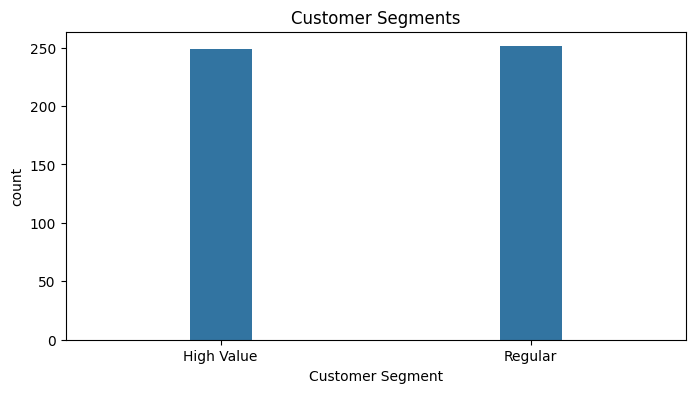

In [31]:
#1.Customer segmants count

plt.figure(figsize = (8,4))
sns.countplot(x = "Customer Segment",data=df,width=0.2)
plt.title("Customer Segments")
plt.show()

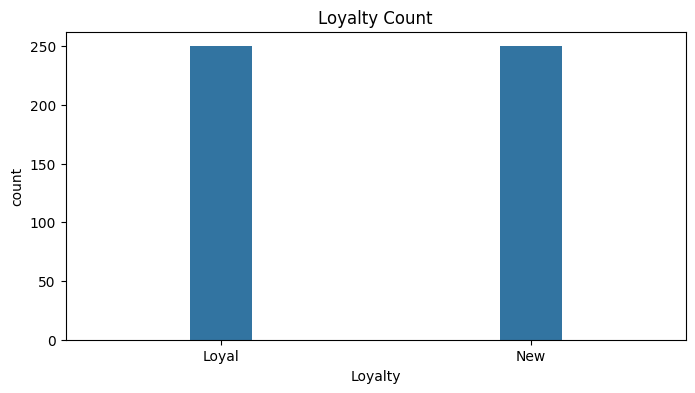

In [32]:
#2. Customers Loyalty count

plt.figure(figsize=(8,4))
sns.countplot(x="Loyalty",data=df,width=0.2)
plt.title("Loyalty Count")
plt.show()

**Observation 5**

**1.The High value and the regular customers are almost same.(Balanced customer segmentation)  
2.The Loyal and the New customers are also same in numbers.(Balanced Loyalty)**

**Whether High value customers spend more time on app/website?**

In [33]:
high_value = df[df["Customer Segment"]=="High Value"]
avg_apptime = high_value["Time on App"].mean()
avg_webtime = high_value["Time on Website"].mean()
print(avg_apptime)
print(avg_webtime)

12.398955823293173
37.07236947791165


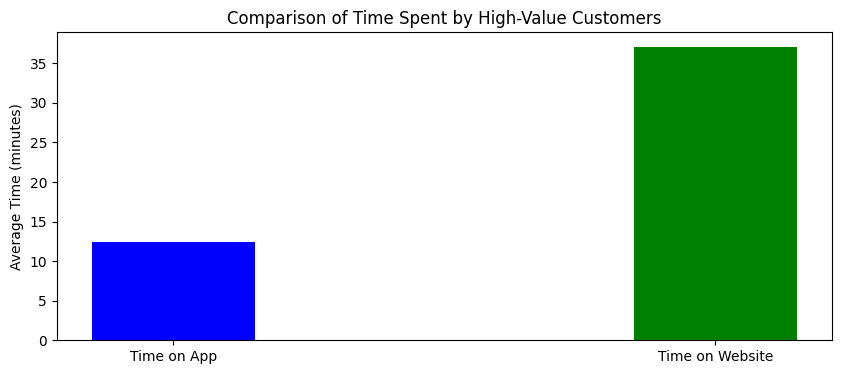

In [34]:
plt.figure(figsize=(10,4))
plt.bar(["Time on App", "Time on Website"], [avg_apptime, avg_webtime], color=['blue', 'green'],width=0.3)
plt.ylabel("Average Time (minutes)")
plt.title("Comparison of Time Spent by High-Value Customers")
plt.show()

**Observation 6**

**1. The High value customers spend more time on Website than on App  
2. The High value customers engage more on website than app  
3. The result helps decide where to invest in features, marketing, and user experience improvements.**

**How much amount loyal customers spend yearly & whether they spend time more on app/website**

In [45]:
df_loyal = df[df["Loyalty"]=="Loyal"]
loyal_amount = df_loyal.groupby("Yearly Amount Spent")["Loyalty"].sum().reset_index()
loyal_apptime = df_loyal["Time on App"].mean()
loyal_webtime = df_loyal["Time on Website"].mean()
print(loyal_amount)
print(loyal_apptime)
print(loyal_webtime)

     Yearly Amount Spent Loyalty
0                 392.99   Loyal
1                 408.64   Loyal
2                 418.60   Loyal
3                 423.31   Loyal
4                 424.76   Loyal
..                   ...     ...
244               708.94   Loyal
245               712.40   Loyal
246               725.58   Loyal
247               744.22   Loyal
248               765.52   Loyal

[249 rows x 2 columns]
12.07696
37.0726


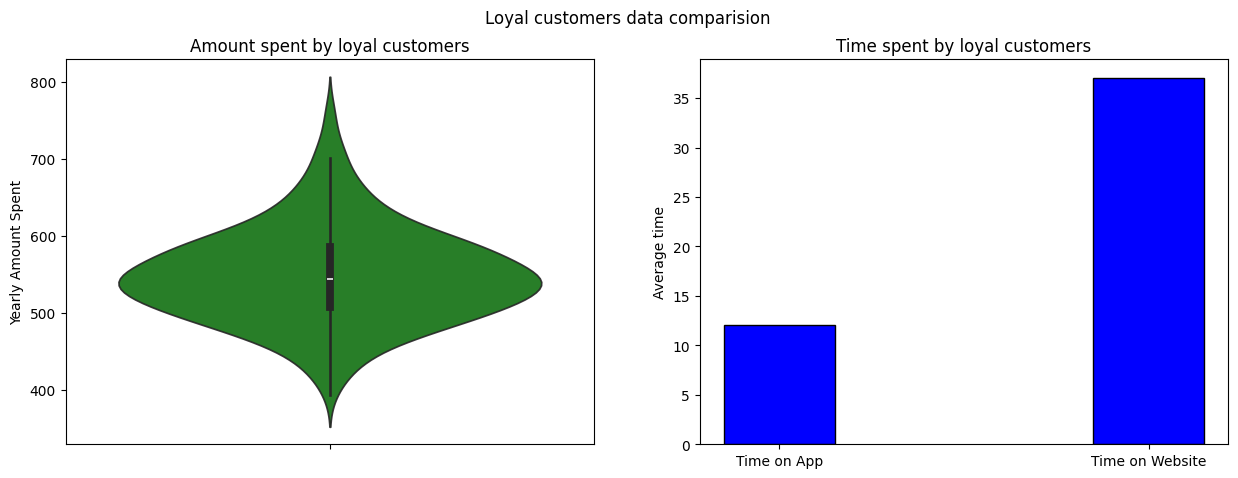

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(y=df_loyal["Yearly Amount Spent"],color="green",alpha=0.9)
plt.ylabel("Yearly Amount Spent")
plt.title("Amount spent by loyal customers")

plt.subplot(1,2,2)
plt.bar(["Time on App","Time on Website"],[loyal_apptime,loyal_webtime],color="blue",edgecolor="black",width=0.3)
plt.ylabel("Average time")
plt.title("Time spent by loyal customers")

plt.suptitle("Loyal customers data comparision")
plt.show()

**Observation 7**

**1. From the violinplot it is clearly visible that the most of the loyal customers spend between 500 to 600  
2. However some loyal customers spend 700+ and 400-  
3. From the bar graph it is clearly visible that loyal customers spend more time on website than app  
4.The company could focus on improving the app experience to increase engagement and spending on mobile devices.**

# Conclusion & Insights

**1.Customers spending over $600/year are heavy users of the website.  
2.Time on the App has a stronger impact on spending than the website.  
3.The high value customers and loyal group of customers spend more time on website.  
4.The app management needs more focus.**